## Overhearing population
### https://iopscience.iop.org/article/10.1209/0295-5075/101/68004/meta
### https://langev.com/pdf/0bqCwMtiFdoJ.pdf

### 1. basic speaker-hearer rules

In [38]:
## basic speaker-hearer rules

import random

## s is one node of P (population-graph)
## M is the dictionary of memories {node:memory list of node}
## V is a predefined vocabulary
def speaker_rule(s,M,V):
    ## the speaker s selects one word w from her inventory
    if len(M[s])==0:
        w = random.choice(V)
        M[s]+=[w]
    else:
        w = random.choice(M[s])
    return w

## h is one node of P (population-graph)
## word is the word uttered by the speaker
## M is the dictionary of memories {node:memory list of node}
def hearer_rule(h,word,M):
    ## the hearer receives word 
    success = False
    if word in M[h]:
        success = True
    return success

### 2. basic dynamics

In [39]:
## s is one node of P (population-graph)
## h is one node of P (population-graph)
## word is speaker's word
## M is the dictionary of memories {node:memory list of node}
## V is a predefined vocabulary

def dynamics(s,h,word,M,V):
    ## hearer's state
    success = hearer_rule(h,word,M)
    ## alignment strategies
    if success == True:
        M[s]=[word]
        M[h]=[word]
    else:
        M[h]+=[word]
    return M  

In [40]:
## some measures

def measure_number_words(M):
    join_M = [item for item in M.values()]
    join_M = [item for sublist in join_M for item in sublist]
    return len(join_M),len(set(join_M))

In [55]:
import networkx as nx
import math 

repetitions = 10
T = 5000
number_nodes = 100
## the simplest version!
P = nx.complete_graph(number_nodes)
number_words = 10
V = range(number_words)
percentage_over = 1/number_nodes

number_list = []
for r in range(repetitions):
    
    M = {node:[] for node in P.nodes()}
    number = []
    
    for t in range(T):
    
        a,b = measure_number_words(M)
        number+=[[a,b]]
    
        ## speaker
        others = list(P.nodes())
        speaker = random.choice(others)
        ## hearer!=speaker!
        others.pop(speaker)
        hearer_central = random.choice(others)
        ## overhearers (percentage of the neighbors of the speaker)
        overhearers = random.sample(list(dict(P[speaker]).keys()),math.ceil(percentage_over*len(P[speaker])))
        ## one overhearer to interact with the speaker
        word = speaker_rule(speaker,M,V)
        ## speaker-hearer interaction!
        M = dynamics(speaker,hearer_central,word,M,V)
        for hearer in overhearers:
            success = hearer_rule(hearer,word,M)
            if success == True:
                M[hearer]=[word]
            else:
                M[hearer]+=[word]    
                
    number_list+=[number]

In [61]:
numberW = []
for item in number_list:
    numberW+=[list(zip(*item))[0]]
    
numberW = [float(sum(col))/len(col) for col in zip(*numberW)]

In [63]:
numberD = []
for item in number_list:
    numberD+=[list(zip(*item))[1]]
    
numberD = [float(sum(col))/len(col) for col in zip(*numberD)]

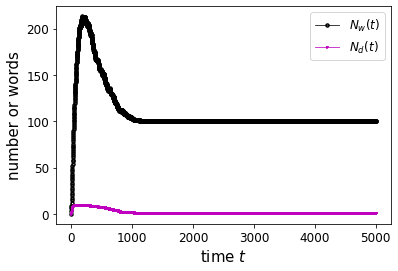

In [64]:
import matplotlib.pyplot as plt

plt.plot(range(len(numberW)), numberW,color='k',linewidth=0.75,marker='o',markersize=3,fillstyle='none',markeredgewidth=1.5,clip_on=False,label=r'$N_w(t)$')
plt.plot(range(len(numberD)), numberD,color='m',linewidth=0.75,marker='+',markersize=3,fillstyle='none',markeredgewidth=1.5,clip_on=False,label=r'$N_d(t)$')

plt.ticklabel_format(axis='x', style='sci',scilimits=(0,5))
plt.legend(loc='best')
plt.ylabel('number or words',fontsize=15)
plt.xlabel('time $t$',fontsize=15)
plt.rcParams.update({'font.size': 12})
plt.savefig('words.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

### 3. frozen overhearers

In [44]:
## In this version, an overhearer may collapse at most one time. 

repetitions = 10
T = 5000
number_nodes = 100
## the simplest version!
P = nx.complete_graph(number_nodes)
number_words = 10
V = range(number_words)
percentage_over = 1/number_nodes

number_list = []
for r in range(repetitions):
    
    M = {node:[] for node in P.nodes()}
    frozen = {node:0 for node in P.nodes()}
    number = []
    
    for t in range(T):
    
        a,b = measure_number_words(M)
        number+=[[a,b]]
    
        ## speaker
        others = list(P.nodes())
        speaker = random.choice(others)
        ## hearer!=speaker!
        others.pop(speaker)
        hearer_central = random.choice(others)
        ## overhearers (percentage of the neighbors of the speaker)
        overhearers = random.sample(list(dict(P[speaker]).keys()),math.ceil(percentage_over*len(P[speaker])))
        ## one overhearer to interact with the speaker
        word = speaker_rule(speaker,M,V)
        ## speaker-hearer interaction!
        M = dynamics(speaker,hearer_central,word,M,V)
        for hearer in overhearers:
            success = hearer_rule(hearer,word,M)
            if success == True:
                if frozen[hearer]==0:
                    M[hearer]=[word]
                    frozen[hearer]=1
            else:
                if frozen[hearer]==0:
                    M[hearer]+=[word]     
                
    number_list+=[number]









        if success == True:
            if frozen[hearer]==0:
                M[hearer]=[word]
                frozen[hearer]=1
        else:
            if frozen[hearer]==0:
                M[hearer]+=[word] 

In [45]:
numberW = list(zip(*number))[0]
numberD = list(zip(*number))[1]

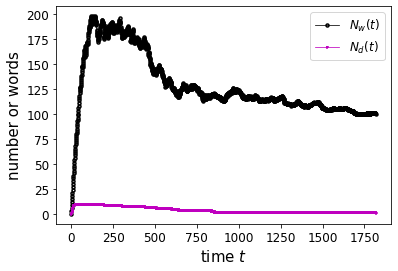

In [46]:
plt.plot(range(len(numberW)), numberW,color='k',linewidth=0.75,marker='o',markersize=3,fillstyle='none',markeredgewidth=1.5,clip_on=False,label=r'$N_w(t)$')
plt.plot(range(len(numberD)), numberD,color='m',linewidth=0.75,marker='+',markersize=3,fillstyle='none',markeredgewidth=1.5,clip_on=False,label=r'$N_d(t)$')

plt.ticklabel_format(axis='x', style='sci',scilimits=(0,5))
plt.legend(loc='best')
plt.ylabel('number or words',fontsize=15)
plt.xlabel('time $t$',fontsize=15)
plt.rcParams.update({'font.size': 12})
plt.savefig('frozen_words.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=800)
plt.show()